In [ ]:
#imported all the libraries used

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [ ]:
#mounted drive to upload csv file

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#path defined from which csv file is read
path="/content/drive/MyDrive/fraud_data/small_data.csv"
data = pd.read_csv(path)

path_cards="/content/drive/MyDrive/fraud_data/sd254_cards.csv"
data_cards = pd.read_csv(path_cards)

path_users="/content/drive/MyDrive/fraud_data/sd254_users.csv"
data_users = pd.read_csv(path_users)
#One-hot encoding for categorical feature 'Sex'
#data = pd.get_dummies(data, columns = ['Sex'])

#Displayed datatypes and null/non-null values
print("Info on transactions")
print(data.info())

print()
print("Info on cards")
print(data_cards.info())

print()
print("Info on users")
print(data_users.info())
#Displayed feature statistics
print()
print("Transactions Statistics")
display(data.describe())

print()
print("Cards Statistics")
display(data_cards.describe())

print()
print("User Statistics")
display(data_users.describe())


#Labeled all features and target
#data = data[['Sex_F', 'Sex_I', 'Sex_M', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']]

#Scaled data - mean = 0, var = 1
#scaler = StandardScaler()
#data[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']] = scaler.fit_transform(data[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']])

Info on transactions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273328 entries, 0 to 273327
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      273328 non-null  int64  
 1   User            273328 non-null  int64  
 2   Card            273328 non-null  int64  
 3   Year            273328 non-null  int64  
 4   Month           273328 non-null  int64  
 5   Day             273328 non-null  int64  
 6   Time            273328 non-null  object 
 7   Amount          273328 non-null  object 
 8   Use Chip        273328 non-null  object 
 9   Merchant Name   273328 non-null  int64  
 10  Merchant City   273328 non-null  object 
 11  Merchant State  228151 non-null  object 
 12  Zip             220082 non-null  float64
 13  MCC             273328 non-null  int64  
 14  Errors?         5072 non-null    object 
 15  Is Fraud?       273328 non-null  object 
dtypes: float64(1), int64(8), object(7)


,Unnamed: 0,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,2.733280e+05,273328.000000,273328.000000,273328.000000,273328.000000,273328.000000,2.733280e+05,220082.000000,273328.000000
mean,1.222290e+07,1003.363318,1.375757,2011.963301,6.546673,15.702548,-4.155375e+17,50874.909329,5526.551224
std,7.027960e+06,568.436459,1.420734,5.054697,3.469510,8.815986,4.782507e+18,29421.721774,898.962999
min,4.310000e+02,0.000000,0.000000,1991.000000,1.000000,1.000000,-9.222899e+18,501.000000,1711.000000
25%,6.131172e+06,513.000000,0.000000,2008.000000,4.000000,8.000000,-4.500543e+18,28351.000000,5300.000000
50%,1.225985e+07,1010.000000,1.000000,2013.000000,7.000000,16.000000,-7.276121e+17,46562.000000,5499.000000
75%,1.831159e+07,1478.000000,2.000000,2016.000000,10.000000,23.000000,3.397453e+18,77564.000000,5812.000000
max,2.438689e+07,1999.000000,8.000000,2020.000000,12.000000,31.000000,9.222877e+18,99829.000000,9402.000000



Cards Statistics


,User,CARD INDEX,Card Number,CVV,Cards Issued,Year PIN last Changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,1003.477058,1.472502,4.820426e+15,506.220794,1.503091,2013.436707
std,571.724745,1.463294,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,508.250000,0.000000,4.486365e+15,257.000000,1.000000,2010.000000
50%,1004.000000,1.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,1493.750000,2.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,1999.000000,8.000000,6.997197e+15,999.000000,3.000000,2020.000000



User Statistics


,Current Age,Retirement Age,Birth Year,Birth Month,Apartment,Zipcode,Latitude,Longitude,FICO Score,Num Credit Cards
count,2000.000000,2000.000000,2000.000000,2000.000000,528.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.391500,66.237500,1973.803000,6.439000,693.547348,50535.412000,37.389225,-91.554765,709.734500,3.073000
std,18.414092,3.628867,18.421234,3.565338,1897.157861,29359.754742,5.114324,16.283293,67.221949,1.637379
min,18.000000,50.000000,1918.000000,1.000000,1.000000,1060.000000,20.880000,-159.410000,480.000000,1.000000
25%,30.000000,65.000000,1961.000000,3.000000,5.000000,28214.250000,33.837500,-97.395000,681.000000,2.000000
50%,44.000000,66.000000,1975.000000,7.000000,10.000000,46305.500000,38.250000,-86.440000,711.500000,3.000000
75%,58.000000,68.000000,1989.000000,10.000000,95.250000,77086.250000,41.200000,-80.130000,753.000000,4.000000
max,101.000000,79.000000,2002.000000,12.000000,9940.000000,99508.000000,61.200000,-68.670000,850.000000,9.000000


In [ ]:
data

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,431,0,0,2003,3,10,20:24,$57.75,Swipe Transaction,-7091578704632084081,Fontanelle,IA,50846.0,5812,NaN,No
1,639,0,0,2003,8,18,07:05,$30.89,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,656,0,0,2003,9,5,20:10,$71.35,Swipe Transaction,-5023497618971072366,Mira Loma,CA,91752.0,5812,NaN,No
3,720,0,0,2003,12,15,20:16,$76.22,Swipe Transaction,-4500542936415012428,La Verne,CA,91750.0,5814,NaN,No
4,870,0,0,2004,6,15,06:22,$144.61,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273323,24386349,1999,1,2019,10,8,09:51,$182.00,Chip Transaction,1270471339275628505,Waianae,HI,96792.0,3730,NaN,No
273324,24386576,1999,1,2019,12,2,07:42,$26.94,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,4121,NaN,No
273325,24386697,1999,1,2019,12,24,11:50,$82.74,Chip Transaction,2058452562437950274,Russellville,AL,35653.0,7538,NaN,No
273326,24386863,1999,1,2020,2,21,15:06,$7.19,Chip Transaction,1641456720718814353,Merrimack,NH,3054.0,5411,NaN,No


In [ ]:
data_cards

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,1997,2,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1998,0,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,1999,0,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No


In [ ]:
data_users

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.0,Freeport,NY,11520,40.65,-73.58,$23550,$48010,$87837,703,3
1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.0,Independence,KY,41051,38.95,-84.54,$24218,$49378,$104480,740,4
1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,$25336,$54654,$27241,618,1


In [ ]:
print(data['Is Fraud?'].value_counts())
print()
print(data["Errors?"].value_counts())
print()
#data["Use Chip"].value_count()
print(data_cards["Card Brand"].value_counts())
print()
print(data_cards["Card Type"].value_counts())
print()
print(data_cards["Card on Dark Web"].value_counts())

No     243571
Yes     29757
Name: Is Fraud?, dtype: int64

Insufficient Balance                     2767
Bad PIN                                   876
Technical Glitch                          544
Bad CVV                                   396
Bad Card Number                           223
Bad Expiration                            209
Bad Zipcode                                21
Bad PIN,Insufficient Balance               11
Bad CVV,Insufficient Balance                4
Insufficient Balance,Technical Glitch       4
Bad PIN,Technical Glitch                    4
Bad Card Number,Insufficient Balance        3
Bad Expiration,Insufficient Balance         3
Bad Expiration,Technical Glitch             3
Bad CVV,Technical Glitch                    2
Bad Expiration,Bad CVV                      2
Name: Errors?, dtype: int64

Mastercard    3209
Visa          2326
Amex           402
Discover       209
Name: Card Brand, dtype: int64

Debit              3511
Credit             2057
Debit (Prepaid)     

In [ ]:
data = data.drop(['Unnamed: 0', 'Month', 'Day', 'Time', 'Merchant Name', 'Merchant City', 'Merchant State', 'Zip'], axis = 1)
data_cards = data_cards.drop(['Card Number', 'Expires', 'CVV', 'Has Chip', 'Cards Issued', 'Acct Open Date', 'Card on Dark Web'], axis = 1)
data_users = data_users.drop(['Person', 'Retirement Age', 'Birth Month', 'Birth Year',  'Address', 'Apartment', 'City', 'State','Zipcode' ,'Latitude', 'Longitude', 'Per Capita Income - Zipcode', 'Num Credit Cards'], axis=1)

In [ ]:
data['Amount'] = data['Amount'].apply(lambda x: x[1:])
data['Amount'] = pd.to_numeric(data['Amount'])

data_cards['Credit Limit'] = data_cards['Credit Limit'].apply(lambda x: x[1:])
data_cards['Credit Limit'] = pd.to_numeric(data_cards['Credit Limit'])

data_users['Yearly Income - Person'] = data_users['Yearly Income - Person'].apply(lambda x: x[1:])
data_users['Yearly Income - Person'] = pd.to_numeric(data_users['Yearly Income - Person'])
data_users['Total Debt'] = data_users['Total Debt'].apply(lambda x: x[1:])
data_users['Total Debt'] = pd.to_numeric(data_users['Total Debt'])

In [ ]:
encoder = LabelEncoder()

data = data.fillna('')
data['Errors?']= encoder.fit_transform(data['Errors?'])
data['Use Chip']= encoder.fit_transform(data['Use Chip'])
data['Is Fraud?']= encoder.fit_transform(data['Is Fraud?'])

data_cards = data_cards.fillna('')
data_cards['Card Brand']= encoder.fit_transform(data_cards['Card Brand'])
data_cards['Card Type']= encoder.fit_transform(data_cards['Card Type'])

data_users = data_users.fillna('')
data_users['Gender']= encoder.fit_transform(data_users['Gender'])

In [ ]:
data_users['User'] = data_users.index

In [ ]:
data = data.join(data_cards.set_index(['User', 'CARD INDEX']), on=['User', 'Card'])
data = data.join(data_users.set_index('User'), on='User')
data

,User,Card,Year,Amount,Use Chip,MCC,Errors?,Is Fraud?,Card Brand,Card Type,Credit Limit,Year PIN last Changed,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score
0,0,0,2003,57.75,2,5812,0,0,3,1,24295,2008,53,0,59696,127613,787
1,0,0,2003,30.89,2,5411,0,0,3,1,24295,2008,53,0,59696,127613,787
2,0,0,2003,71.35,2,5812,0,0,3,1,24295,2008,53,0,59696,127613,787
3,0,0,2003,76.22,2,5814,0,0,3,1,24295,2008,53,0,59696,127613,787
4,0,0,2004,144.61,2,5411,0,0,3,1,24295,2008,53,0,59696,127613,787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273323,1999,1,2019,182.00,0,3730,0,0,3,0,14400,2017,21,0,65909,181261,673
273324,1999,1,2019,26.94,1,4121,0,0,3,0,14400,2017,21,0,65909,181261,673
273325,1999,1,2019,82.74,0,7538,0,0,3,0,14400,2017,21,0,65909,181261,673
273326,1999,1,2020,7.19,0,5411,0,0,3,0,14400,2017,21,0,65909,181261,673


In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data

,User,Card,Year,Amount,Use Chip,MCC,Errors?,Is Fraud?,Card Brand,Card Type,Credit Limit,Year PIN last Changed,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score
0,1660,2,2013,9.27,2,5300,0,0,2,0,16600,2015,41,0,48038,83238,704
1,1807,0,2014,37.75,2,5541,0,0,0,0,9500,2015,38,1,40478,76392,718
2,526,0,2017,25.28,0,5211,0,0,3,0,3900,2014,24,0,24648,32962,600
3,1504,1,2019,22.56,2,5499,0,0,2,0,6400,2014,82,1,33356,938,566
4,490,5,2014,58.04,2,4900,0,0,3,1,16578,2010,91,1,40141,805,850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273323,465,0,2011,13.59,2,5411,0,0,3,1,11588,2008,40,1,32126,56283,770
273324,424,3,2010,21.89,1,5311,0,1,0,0,19300,2018,54,0,76431,115362,716
273325,1211,2,2012,1.85,2,7538,0,0,3,0,3900,2010,54,0,38318,93284,748
273326,1825,3,2015,3.64,0,5411,0,0,2,1,32895,2005,47,1,62432,95799,741


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

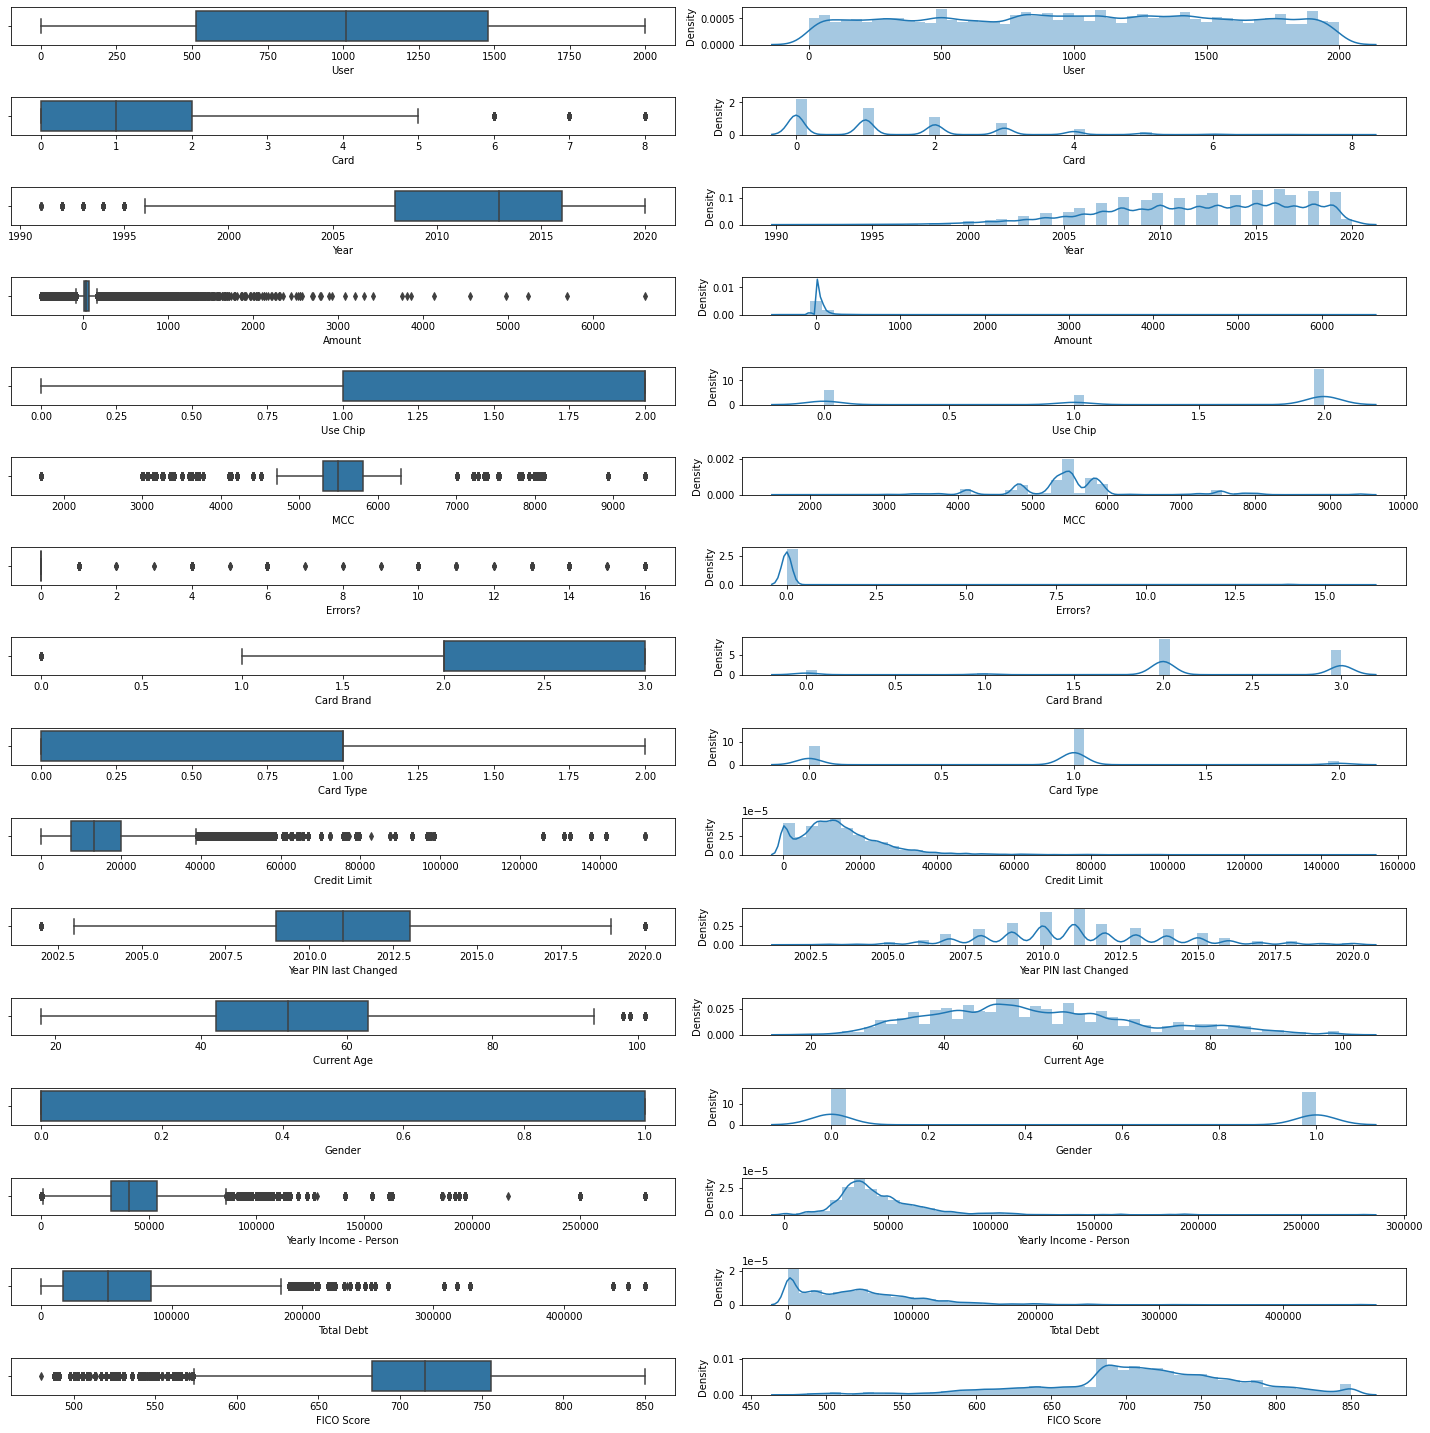

In [ ]:
#Box plots and distribution curves of all features

fig, ax = plt.subplots(16, 2, figsize = (20, 20))
sns.boxplot(x= data["User"], ax = ax[0,0])
sns.distplot(data['User'], ax = ax[0,1])
sns.boxplot(x= data["Card"], ax = ax[1,0])
sns.distplot(data['Card'], ax = ax[1,1])
sns.boxplot(x= data["Year"], ax = ax[2,0])
sns.distplot(data['Year'], ax = ax[2,1])
sns.boxplot(x= data["Amount"], ax = ax[3,0])
sns.distplot(data['Amount'], ax = ax[3,1])
sns.boxplot(x= data["Use Chip"], ax = ax[4,0])
sns.distplot(data['Use Chip'], ax = ax[4,1])
sns.boxplot(x= data["MCC"], ax = ax[5,0])
sns.distplot(data['MCC'], ax = ax[5,1])
sns.boxplot(x= data["Errors?"], ax = ax[6,0])
sns.distplot(data['Errors?'], ax = ax[6,1])
sns.boxplot(x= data["Card Brand"], ax = ax[7,0])
sns.distplot(data['Card Brand'], ax = ax[7,1])
sns.boxplot(x= data["Card Type"], ax = ax[8,0])
sns.distplot(data['Card Type'], ax = ax[8,1])
sns.boxplot(x= data["Credit Limit"], ax = ax[9,0])
sns.distplot(data['Credit Limit'], ax = ax[9,1])
sns.boxplot(x= data["Year PIN last Changed"], ax = ax[10,0])
sns.distplot(data['Year PIN last Changed'], ax = ax[10,1])
sns.boxplot(x= data["Current Age"], ax = ax[11,0])
sns.distplot(data['Current Age'], ax = ax[11,1])
sns.boxplot(x= data["Gender"], ax = ax[12,0])
sns.distplot(data['Gender'], ax = ax[12,1])
sns.boxplot(x= data["Yearly Income - Person"], ax = ax[13,0])
sns.distplot(data['Yearly Income - Person'], ax = ax[13,1])
sns.boxplot(x= data["Total Debt"], ax = ax[14,0])
sns.distplot(data['Total Debt'], ax = ax[14,1])
sns.boxplot(x= data["FICO Score"], ax = ax[15,0])
sns.distplot(data['FICO Score'], ax = ax[15,1])

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


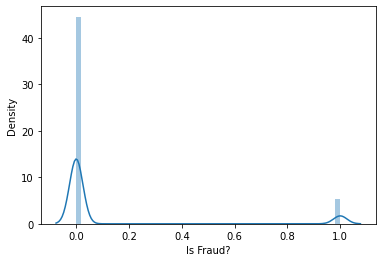

In [ ]:
#Distribution curves of target

sns.distplot(data['Is Fraud?'])

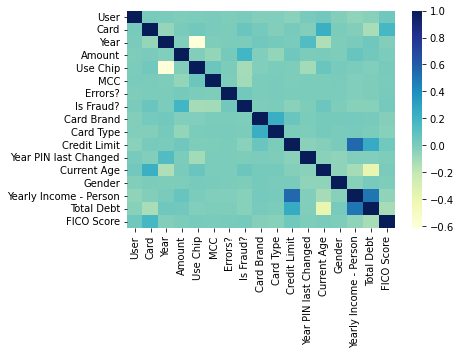

In [ ]:
corr = data.corr()
dataplot = sb.heatmap(corr, cmap="YlGnBu")
data = data.iloc[:,:]

In [ ]:
data = data[['User', 'Card', 'Year',	'Amount',	'Use Chip',	'MCC',	'Errors?',	'Card Brand',	'Card Type',	'Credit Limit',	'Year PIN last Changed',	'Current Age',	'Gender',	'Yearly Income - Person',	'Total Debt',	'FICO Score', 	'Is Fraud?']]
data

,User,Card,Year,Amount,Use Chip,MCC,Errors?,Card Brand,Card Type,Credit Limit,Year PIN last Changed,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score,Is Fraud?
0,1660,2,2013,9.27,2,5300,0,2,0,16600,2015,41,0,48038,83238,704,0
1,1807,0,2014,37.75,2,5541,0,0,0,9500,2015,38,1,40478,76392,718,0
2,526,0,2017,25.28,0,5211,0,3,0,3900,2014,24,0,24648,32962,600,0
3,1504,1,2019,22.56,2,5499,0,2,0,6400,2014,82,1,33356,938,566,0
4,490,5,2014,58.04,2,4900,0,3,1,16578,2010,91,1,40141,805,850,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273323,465,0,2011,13.59,2,5411,0,3,1,11588,2008,40,1,32126,56283,770,0
273324,424,3,2010,21.89,1,5311,0,0,0,19300,2018,54,0,76431,115362,716,1
273325,1211,2,2012,1.85,2,7538,0,3,0,3900,2010,54,0,38318,93284,748,0
273326,1825,3,2015,3.64,0,5411,0,2,1,32895,2005,47,1,62432,95799,741,0


In [ ]:
np_data = np.array(data)
X = np_data
Y = np_data
X = X[:,0: (X.shape[1] - 1)]
Y = Y[:, X.shape[1]]

X = np.c_[np.ones(X.shape[0]), X]

X_train = X[0: int(0.8*X.shape[0]), :]
X_test = X[int(0.8*X.shape[0]):, :]
Y = Y.reshape(Y.shape[0], 1)
Y_train = Y[0:int(0.8*Y.shape[0]), :]
Y_test = Y[int(0.8*Y.shape[0]):, :]

# **First cell below** - 
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

# **Second cell below** - 
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
where min, max = feature_range.

# **Third cell below** - 
Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

In [ ]:
np_data = np.array(data)
X_mm = np_data
Y_mm = np_data
X_mm = X_mm[:,0: (X_mm.shape[1] - 1)]
Y_mm = Y_mm[:, X_mm.shape[1]]

scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X_mm)

X_mm = np.c_[np.ones(X_mm.shape[0]), X_mm]

X_train_mm = X_mm[0: int(0.8*X_mm.shape[0]), :]
X_test_mm = X_mm[int(0.8*X_mm.shape[0]):, :]
Y_mm = Y_mm.reshape(Y_mm.shape[0], 1)
Y_train_mm = Y_mm[0:int(0.8*Y_mm.shape[0]), :]
Y_test_mm = Y_mm[int(0.8*Y_mm.shape[0]):, :]

In [ ]:
np_data = np.array(data)
X_ss = np_data
Y_ss = np_data
X_ss = X_ss[:,0: (X_ss.shape[1] - 1)]
Y_ss = Y_ss[:, X_ss.shape[1]]

scaler = StandardScaler()
X_ss = scaler.fit_transform(X_ss)

X_ss = np.c_[np.ones(X_ss.shape[0]), X_ss]

X_train_ss = X_ss[0: int(0.8*X_ss.shape[0]), :]
X_test_ss = X_ss[int(0.8*X_ss.shape[0]):, :]
Y_ss = Y_ss.reshape(Y_ss.shape[0], 1)
Y_train_ss = Y_ss[0:int(0.8*Y_ss.shape[0]), :]
Y_test_ss = Y_ss[int(0.8*Y_ss.shape[0]):, :]

In [ ]:
np_data = np.array(data)
X_r = np_data
Y_r= np_data
X_r = X_r[:,0: (X_r.shape[1] - 1)]
Y_r = Y_r[:, X_r.shape[1]]

scaler = RobustScaler()
X_r = scaler.fit_transform(X_r)

X_r = np.c_[np.ones(X_r.shape[0]), X_r]

X_train_r = X_r[0: int(0.8*X_r.shape[0]), :]
X_test_r = X_r[int(0.8*X_r.shape[0]):, :]
Y_r = Y_r.reshape(Y_r.shape[0], 1)
Y_train_r = Y_r[0:int(0.8*Y_r.shape[0]), :]
Y_test_r = Y_r[int(0.8*Y_r.shape[0]):, :]

# **RANDOM FOREST**  

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
y_pred_train=clf.predict(X_train)
print("accuracy",metrics.accuracy_score(Y_test,y_pred))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy 0.9621153916511177


In [ ]:
clf_mm=RandomForestClassifier(n_estimators=100)
clf_mm.fit(X_train_mm,Y_train_mm)
y_pred_mm=clf.predict(X_test_mm)
y_pred_train_mm=clf_mm.predict(X_train)
print("accuracy",metrics.accuracy_score(Y_test_mm,y_pred_mm))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy 0.10937328504006147


In [ ]:
clf_ss=RandomForestClassifier(n_estimators=100)
clf_ss.fit(X_train_ss,Y_train_ss)
y_pred_ss=clf.predict(X_test_ss)
y_pred_train_ss=clf_ss.predict(X_train)
print("accuracy",metrics.accuracy_score(Y_test_ss,y_pred_ss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
clf_r=RandomForestClassifier(n_estimators=100)
clf_r.fit(X_train_r,Y_train_r)
y_pred_r=clf.predict(X_test_r)
y_pred_train_r=clf_r.predict(X_train)
print("accuracy",metrics.accuracy_score(Y_test_r,y_pred_r))

In [ ]:
print("For training - ")

print(metrics.accuracy_score(Y_train,y_pred_train))
print(metrics.f1_score(Y_train,y_pred_train))
print(metrics.precision_score(Y_train,y_pred_train))
print(metrics.recall_score(Y_train,y_pred_train))
print()
print("For testing - ")
print(metrics.accuracy_score(Y_test,y_pred))
print(metrics.f1_score(Y_test,y_pred))
print(metrics.precision_score(Y_test,y_pred))
print(metrics.recall_score(Y_test,y_pred))
print()
print(metrics.confusion_matrix(Y_test,y_pred))


In [ ]:
import seaborn as sn
from sklearn import naive_bayes
nb = naive_bayes.GaussianNB()
nb_r= nb.fit(X_train_r,Y_train_r.ravel())
y_pred=nb.predict(X_test_r)

arr=metrics.confusion_matrix(Y_test_r,y_pred)
df_cm=pd.DataFrame(arr)
print("Confusion Matrix")
sn.heatmap(df_cm,annot=True)


In [ ]:
clf = LogisticRegression().fit(X_train, Y_train)
clf_mm = LogisticRegression().fit(X_train_mm, Y_train_mm)
clf_ss = LogisticRegression().fit(X_train_ss, Y_train_ss)
clf_r = LogisticRegression().fit(X_train_r, Y_train_r)

In [ ]:
print("For training - ")
print(clf.score(X_train, Y_train))
print(clf_mm.score(X_train_mm, Y_train_mm))
print(clf_ss.score(X_train_ss, Y_train_ss))
print(clf_r.score(X_train_r, Y_train_r))
print()
print("For testing - ")
print(clf.score(X_test, Y_test))
print(clf_mm.score(X_test_mm, Y_test_mm))
print(clf_ss.score(X_test_ss, Y_test_ss))
print(clf_r.score(X_test_r, Y_test_r))

In [ ]:
Y_pred = clf.predict(X_test)
Y_pred_mm = clf_mm.predict(X_test_mm)
Y_pred_ss = clf_ss.predict(X_test_ss)
Y_pred_r = clf_r.predict(X_test_r)


In [ ]:
first = 0
second = 0
third = 0
fourth = 0

#For No preprocessing
#Computed True positives, False positives, False Negatives and True Negatives

total_pred = Y_pred.shape[0]
for i in range(Y_pred.shape[0]):
  if Y_pred[i] == Y_test[i][0] and Y_test[i][0] == 1.0:
    first = first + 1
  if Y_pred[i] != Y_test[i][0] and Y_test[i][0] == 1.0:
    second = second + 1
  if Y_pred[i] != Y_test[i][0] and Y_test[i][0] == 0.0:
    third = third + 1
  if Y_pred[i] == Y_test[i][0] and Y_test[i][0] == 0.0:
    fourth = fourth + 1

#Constructed confusion matrix
confusion_matrix = np.array([[first, second], [third, fourth]])

#Computed Accuracy, Precision, Recall and f_1 Score and printed them
precision = first/(first+second)
recall = first/(first+third)
print("Confusion matrix (No pre processing):")
print(str(confusion_matrix))
print("Accuracy: ", str((first+fourth)/(first+second+third+fourth) * 100), "%")
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("f1_Score: ", str(2*((precision*recall)/(precision+recall))))

#For max min scaled data
#Computed True positives, False positives, False Negatives and True Negatives

first = 0
second = 0
third = 0
fourth = 0

total_pred = Y_pred_mm.shape[0]
for i in range(Y_pred_mm.shape[0]):
  if Y_pred_mm[i] == Y_test_mm[i][0] and Y_test_mm[i][0] == 1.0:
    first = first + 1
  if Y_pred_mm[i] != Y_test_mm[i][0] and Y_test_mm[i][0] == 1.0:
    second = second + 1
  if Y_pred_mm[i] != Y_test_mm[i][0] and Y_test_mm[i][0] == 0.0:
    third = third + 1
  if Y_pred_mm[i] == Y_test_mm[i][0] and Y_test_mm[i][0] == 0.0:
    fourth = fourth + 1

#Constructed confusion matrix
confusion_matrix = np.array([[first, second], [third, fourth]])

#Computed Accuracy, Precision, Recall and f_1 Score and printed them
precision = first/(first+second)
recall = first/(first+third)
print()
print("Confusion matrix (Max Min scaling):")
print(str(confusion_matrix))
print("Accuracy: ", str((first+fourth)/(first+second+third+fourth) * 100), "%")
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("f1_Score: ", str(2*((precision*recall)/(precision+recall))))

#####

first = 0
second = 0
third = 0
fourth = 0

#For Standard scaling data
#Computed True positives, False positives, False Negatives and True Negatives

total_pred = Y_pred_ss.shape[0]
for i in range(Y_pred_ss.shape[0]):
  if Y_pred_ss[i] == Y_test_ss[i][0] and Y_test_ss[i][0] == 1.0:
    first = first + 1
  if Y_pred_ss[i] != Y_test_ss[i][0] and Y_test_ss[i][0] == 1.0:
    second = second + 1
  if Y_pred_ss[i] != Y_test_ss[i][0] and Y_test_ss[i][0] == 0.0:
    third = third + 1
  if Y_pred_ss[i] == Y_test_ss[i][0] and Y_test_ss[i][0] == 0.0:
    fourth = fourth + 1

#Constructed confusion matrix
confusion_matrix = np.array([[first, second], [third, fourth]])

#Computed Accuracy, Precision, Recall and f_1 Score and printed them
precision = first/(first+second)
recall = first/(first+third)
print()
print("Confusion matrix (Standard scaling)):")
print(str(confusion_matrix))
print("Accuracy: ", str((first+fourth)/(first+second+third+fourth) * 100), "%")
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("f1_Score: ", str(2*((precision*recall)/(precision+recall))))

#For robust scaling
#Computed True positives, False positives, False Negatives and True Negatives

first = 0
second = 0
third = 0
fourth = 0

total_pred = Y_pred_r.shape[0]
for i in range(Y_pred_r.shape[0]):
  if Y_pred_r[i] == Y_test_r[i][0] and Y_test_r[i][0] == 1.0:
    first = first + 1
  if Y_pred_r[i] != Y_test_r[i][0] and Y_test_r[i][0] == 1.0:
    second = second + 1
  if Y_pred_r[i] != Y_test_r[i][0] and Y_test_r[i][0] == 0.0:
    third = third + 1
  if Y_pred_r[i] == Y_test_r[i][0] and Y_test_r[i][0] == 0.0:
    fourth = fourth + 1

#Constructed confusion matrix
confusion_matrix = np.array([[first, second], [third, fourth]])

#Computed Accuracy, Precision, Recall and f_1 Score and printed them
precision = first/(first+second)
recall = first/(first+third)
print()
print("Confusion matrix (Robust scaling):")
print(str(confusion_matrix))
print("Accuracy: ", str((first+fourth)/(first+second+third+fourth) * 100), "%")
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("f1_Score: ", str(2*((precision*recall)/(precision+recall))))


neural network


In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,3), random_state=3)
clf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 3), random_state=3,
              solver='lbfgs')

In [ ]:
y_pred=clf.predict(X_test)
print("accuracy",metrics.accuracy_score(Y_test,y_pred))

accuracy 0.8906267149599385


In [ ]:
print(metrics.accuracy_score(Y_test,y_pred))
print(metrics.f1_score(Y_test,y_pred))
print(metrics.precision_score(Y_test,y_pred))
print(metrics.recall_score(Y_test,y_pred))

0.8906267149599385
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_train=clf.predict(X_test)

In [ ]:
print(metrics.accuracy_score(Y_test,y_pred_train))
print(metrics.f1_score(Y_test,y_pred_train))
print(metrics.precision_score(Y_test,y_pred_train))
print(metrics.recall_score(Y_test,y_pred_train))
print()

0.8906267149599385
0.0
0.0
0.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
